**Data Mining Group 4 Jupyter Notebook**

By: Assaf Bohen, Adrian Nica, TJ Jablonski

In [1]:
import requests
import zipfile
import io
import pandas as pd
from urllib.parse import urlparse
import os

def download_and_extract_csv(zip_url):
    """
    Downloads a ZIP file from `zip_url`, extracts the first .csv file found,
    and returns it as a Pandas DataFrame.
    """
    #determines if zip is found
    response = requests.get(zip_url)
    if response.status_code == 200:
        zip_content = io.BytesIO(response.content)
        
        #extract csv files
        with zipfile.ZipFile(zip_content, 'r') as zip_ref:
            for file_name in zip_ref.namelist():
                if file_name.endswith('.csv'):
                    with zip_ref.open(file_name) as csv_file:
                        df = pd.read_csv(csv_file)

                        #print success
                        parsed_url = urlparse(zip_url)
                        print(f'Successfully extracted {file_name} from {os.path.basename(parsed_url.path)}')
                        return df

        #no csv files found
        return None
    else:
        print(f"Failed to retrieve ZIP from {zip_url}")
        return None

In [2]:
#urls to zip files
csv_url_2024 = "https://cdn.sanity.io/files/jo7n4k8s/production/262f04c41d99fea692e0125c342e446782233fe4.zip/stack-overflow-developer-survey-2024.zip"
csv_url_2023 = "https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip"
csv_url_2022 = "https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip"

#download csv files
odf_2024 = download_and_extract_csv(csv_url_2024)
odf_2023 = download_and_extract_csv(csv_url_2023)
odf_2022 = download_and_extract_csv(csv_url_2022)

Successfully extracted survey_results_public.csv from stack-overflow-developer-survey-2024.zip
Successfully extracted survey_results_public.csv from stack-overflow-developer-survey-2023.zip
Successfully extracted survey_results_public.csv from stack-overflow-developer-survey-2022.zip


In [3]:
#converts column names to uppercase and removes spacing
odf_2024.columns = odf_2024.columns.str.upper().str.replace(" ", "")
odf_2023.columns = odf_2023.columns.str.upper().str.replace(" ", "")
odf_2022.columns = odf_2022.columns.str.upper().str.replace(" ", "")

#prints all rows
with pd.option_context('display.max_columns', None,
                       'display.max_rows', None,
                       'display.width', 6000):
    print(odf_2024.head())

   RESPONSEID                      MAINBRANCH                 AGE           EMPLOYMENT REMOTEWORK   CHECK                                   CODINGACTIVITIES                                            EDLEVEL                                          LEARNCODE                                    LEARNCODEONLINE                                            TECHDOC YEARSCODE YEARSCODEPRO                DEVTYPE ORGSIZE PURCHASEINFLUENCE BUYNEWTOOL BUILDVSBUY TECHENDORSE                                            COUNTRY CURRENCY  COMPTOTAL                             LANGUAGEHAVEWORKEDWITH                             LANGUAGEWANTTOWORKWITH                                    LANGUAGEADMIRED           DATABASEHAVEWORKEDWITH      DATABASEWANTTOWORKWITH             DATABASEADMIRED                    PLATFORMHAVEWORKEDWITH                    PLATFORMWANTTOWORKWITH                           PLATFORMADMIRED                  WEBFRAMEHAVEWORKEDWITH            WEBFRAMEWANTTOWORKWITH               WEBFRA

In [4]:
#drop all cols from odf_2024 that didn't select Apples (only survey to check for bots)
print(f'odf_2024 rows before dropping bots: {odf_2024.shape[0]}')
odf_2024 = odf_2024[odf_2024['CHECK'] == 'Apples']
print(f'odf_2024 rows after dropping bots: {odf_2024.shape[0]}\n')

#finds common column names across all dfs
common_cols = set(odf_2024.columns).intersection(odf_2023.columns).intersection(odf_2022.columns)

#creates copies of dfs
df_2024 = odf_2024[list(common_cols)].copy()
df_2023 = odf_2023[list(common_cols)].copy()
df_2022 = odf_2022[list(common_cols)].copy()

#adds a year column to all dfs
df_2024["year"] = 2024
df_2023["year"] = 2023
df_2022["year"] = 2022

#combined the common columns of the dfs
combined_df = pd.concat([df_2024, df_2023, df_2022], ignore_index=True)

#prints shape and all rows
print(f"Combined DataFrame shape: {combined_df.shape}")
with pd.option_context('display.max_columns', None,
                       'display.max_rows', None,
                       'display.width', 6000):
    print(combined_df.head())

odf_2024 rows before dropping bots: 65437
odf_2024 rows after dropping bots: 65437

Combined DataFrame shape: (227889, 63)
                                           LEARNCODE                      TOOLSTECHHAVEWORKEDWITH                      TOOLSTECHWANTTOWORKWITH           DATABASEHAVEWORKEDWITH                                         NEWSOSITES FREQUENCY_3                                            EDLEVEL           EMPLOYMENT PROFESSIONALTECH           SURVEYLENGTH KNOWLEDGE_7                  ICORPM KNOWLEDGE_2  RESPONSEID             SOVISITFREQ KNOWLEDGE_5 YEARSCODE ORGSIZE  COMPTOTAL            WEBFRAMEWANTTOWORKWITH TIMESEARCHING SURVEYEASE FREQUENCY_2         NEWCOLLABTOOLSHAVEWORKEDWITH             OFFICESTACKASYNCWANTTOWORKWITH SOACCOUNT                                            COUNTRY                             LANGUAGEWANTTOWORKWITH BUYNEWTOOL                                   CODINGACTIVITIES                           MISCTECHWANTTOWORKWITH                    PLATFORM

-------------------------------------------------------------------------------------                       
.

**Compensation Data Exploration**

.

-------------------------------------------------------------------------------------

In [5]:
#show changes
print(f'Number of columns in compensation_df: {combined_df.shape[1]}')

#columns to include in compensatiion_df
compensation_include_columns = [
    'CONVERTEDCOMPYEARLY',
    'COUNTRY',
    'DEVTYPE',
    'EDLEVEL',
    'YEARSCODE',
    'YEARSCODEPRO',
    'ORGSIZE'
]

#creates jobsat_df
compensation_df = combined_df[compensation_include_columns]

#show changes
print(f'Number of columns in compensation_df: {compensation_df.shape[1]}')
compensation_df.head(3)

Number of columns in compensation_df: 63
Number of columns in compensation_df: 7


,CONVERTEDCOMPYEARLY,COUNTRY,DEVTYPE,EDLEVEL,YEARSCODE,YEARSCODEPRO,ORGSIZE
0,NaN,United States of America,NaN,Primary/elementary school,NaN,NaN,NaN
1,NaN,United Kingdom of Great Britain and Northern I...,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,NaN
2,NaN,United Kingdom of Great Britain and Northern I...,Developer Experience,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",37,27,NaN


**Cleaning**

In [6]:
#drop all NaN values in CONVERTEDCOMPYEARLY column
print(f'Rows before dropping NaN CCY values: {compensation_df.shape[0]}')
compensation_df = compensation_df.dropna(subset=['CONVERTEDCOMPYEARLY'])
print(f'Rows after dropping NaN CCY values: {compensation_df.shape[0]}\n')

#drop all remaining NaN values
print(f'Rows before dropping all remaining NaN values: {compensation_df.shape[0]}')
compensation_df = compensation_df.dropna()
print(f'Rows after dropping all remaining NaN values: {compensation_df.shape[0]}\n')

#ensure no more NaN
if sum(compensation_df.isna().sum()) == 0:
    print('All NaN values successfully removed\n')
else:
    print('Dataset still contains NaN values\n')

#drop countries that appear less than 10 times
country_counts = compensation_df['COUNTRY'].value_counts()
rare_countries = country_counts[country_counts > 10].index
print(f"Rows before dropping countries that don't appear at least 10 times: {compensation_df.shape[0]}")
compensation_df = compensation_df[compensation_df['COUNTRY'].isin(rare_countries)]
print(f"Rows after dropping countries that don't appear at least 10 times: {compensation_df.shape[0]}")

#drop outliers based on 1.5*IQR
print(f"Rows before dropping compensation outliers: {compensation_df.shape[0]}")
Q1 = compensation_df['CONVERTEDCOMPYEARLY'].quantile(0.25)
Q3 = compensation_df['CONVERTEDCOMPYEARLY'].quantile(0.75)
IQR = Q3 - Q1
compensation_df = compensation_df[
    (compensation_df['CONVERTEDCOMPYEARLY'] >= Q1 - 1.5 * IQR) &
    (compensation_df['CONVERTEDCOMPYEARLY'] <= Q3 + 1.5 * IQR)
]
print(f"Rows before dropping compensation outliers: {compensation_df.shape[0]}")

#reset index
compensation_df = compensation_df.reset_index(drop=True)

Rows before dropping NaN CCY values: 227889
Rows after dropping NaN CCY values: 109525

Rows before dropping all remaining NaN values: 109525
Rows after dropping all remaining NaN values: 108753

All NaN values successfully removed

Rows before dropping countries that don't appear at least 10 times: 108753
Rows after dropping countries that don't appear at least 10 times: 108562
Rows before dropping compensation outliers: 108562
Rows before dropping compensation outliers: 102856


In [7]:
import random
from sklearn.preprocessing import MultiLabelBinarizer

#manually ordinal encode
orgsize_order = {
    'Just me - I am a freelancer, sole proprietor, etc.' : 1,
    '2 to 9 employees' : 2,
    '10 to 19 employees' : 3,
    '20 to 99 employees' : 4,
    '100 to 499 employees' : 5,
    '500 to 999 employees' : 6,
    '1,000 to 4,999 employees' : 7,
    '5,000 to 9,999 employees' : 8,
    '10,000 or more employees' : 9,
    "I don’t know" : random.randint(1, 9)
}
compensation_df['ORGSIZE'] = compensation_df['ORGSIZE'].map(orgsize_order)

#hot encode COUNTRY and add to compensation_df
country_dummies = pd.get_dummies(compensation_df['COUNTRY'], prefix='COUNTRY').astype(int)
compensation_df = pd.concat([compensation_df.drop(columns=['COUNTRY']), country_dummies], axis=1)

#hot encode EDLEVEL and add to compensation_df
edlevel_dummies = pd.get_dummies(compensation_df['EDLEVEL'], prefix='EDLEVEL').astype(int)
compensation_df = pd.concat([compensation_df.drop(columns=['EDLEVEL']), edlevel_dummies], axis=1)

#ultilabel encode DEVTYPE
compensation_df['DEVTYPE'] = compensation_df['DEVTYPE'].str.split(';').apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else [])
mlb = MultiLabelBinarizer()
devtype_encoded = mlb.fit_transform(compensation_df['DEVTYPE'])
devtype_df = pd.DataFrame(devtype_encoded, columns=mlb.classes_, index=compensation_df.index)
compensation_df = pd.concat([compensation_df.drop(columns=['DEVTYPE']), devtype_df], axis=1)

#convert YEARSCODE to int
compensation_df['YEARSCODE'] = compensation_df['YEARSCODE'].replace({
    'More than 50 years': '50',
    'Less than 1 year': '1'
})
compensation_df['YEARSCODE'] = compensation_df['YEARSCODE'].astype(int)

#convert YEARSCODEPRO to int
compensation_df['YEARSCODEPRO'] = compensation_df['YEARSCODEPRO'].replace({
    'More than 50 years': '50',
    'Less than 1 year': '1'
})
compensation_df['YEARSCODEPRO'] = compensation_df['YEARSCODEPRO'].astype(int)

#rename columns and ensures all numeric
numeric = True
compensation_df = compensation_df.rename(columns={'CONVERTEDCOMPYEARLY': 'COMPENSATION'})
for col in compensation_df.columns:
    if compensation_df[col].dtype not in [int, float, 'int64', 'float64']:
        numeric = False
    if col[:8] == 'COUNTRY_':
        compensation_df = compensation_df.rename(columns={col: col[8:]}) 
    if col[:8] == 'EDLEVEL_':
        compensation_df = compensation_df.rename(columns={col: col[8:]})

if(numeric):
    print('All columns are numerical\n')
else:
    print('One or more columns are non-numerical\n')

#show new columns
pd.set_option('display.max_columns', None)
print(compensation_df.shape)
compensation_df.head()



All columns are numerical

(102856, 183)


,COMPENSATION,YEARSCODE,YEARSCODEPRO,ORGSIZE,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,Benin,Bolivia,Bosnia and Herzegovina,Brazil,Bulgaria,Cambodia,Cameroon,Canada,Chile,China,Colombia,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Côte d'Ivoire,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Georgia,Germany,Ghana,Greece,Guatemala,Honduras,Hong Kong (S.A.R.),Hungary,Iceland,India,Indonesia,"Iran, Islamic Republic of...",Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Latvia,Lebanon,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritius,Mexico,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Nepal,Netherlands,New Zealand,Nicaragua,Nigeria,Nomadic,Norway,Pakistan,Palestine,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Republic of Moldova,Republic of North Macedonia,Romania,Russian Federation,Rwanda,Saudi Arabia,Senegal,Serbia,Singapore,Slovakia,Slovenia,South Africa,South Korea,Spain,Sri Lanka,Sudan,Sweden,Switzerland,Syrian Arab Republic,Taiwan,Thailand,The former Yugoslav Republic of Macedonia,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,"Venezuela, Bolivarian Republic of...",Viet Nam,Yemen,Zambia,Zimbabwe,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other doctoral degree (Ph.D., Ed.D., etc.)",Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Professional degree (JD, MD, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else,Academic researcher,Blockchain,Cloud infrastructure engineer,Data engineer,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,Developer Advocate,Developer Experience,"Developer, AI","Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices","Developer, front-end","Developer, full-stack","Developer, game or graphics","Developer, mobile",Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Hardware Engineer,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
0,7322.0,3,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30074.0,12,6,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,91295.0,15,6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,53703.0,27,17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

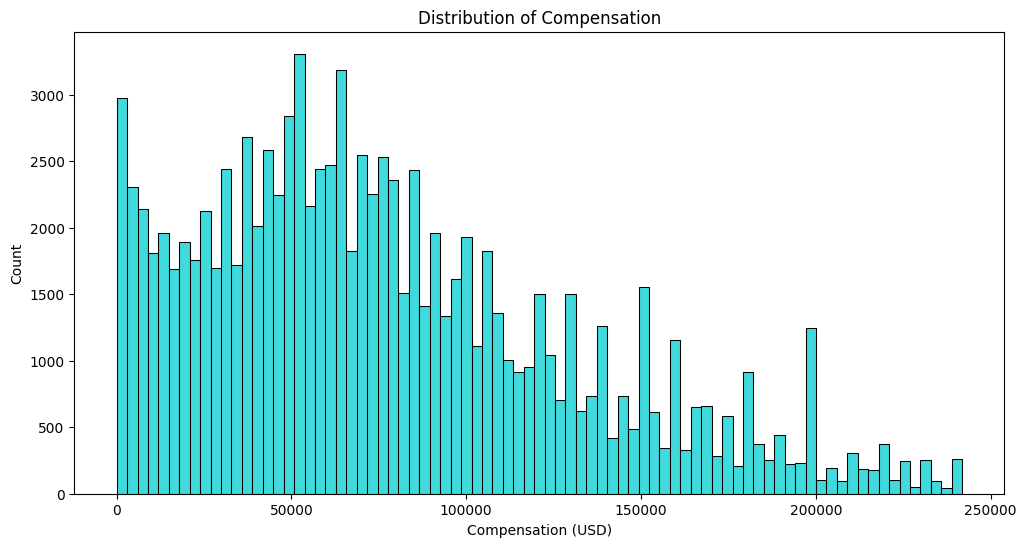

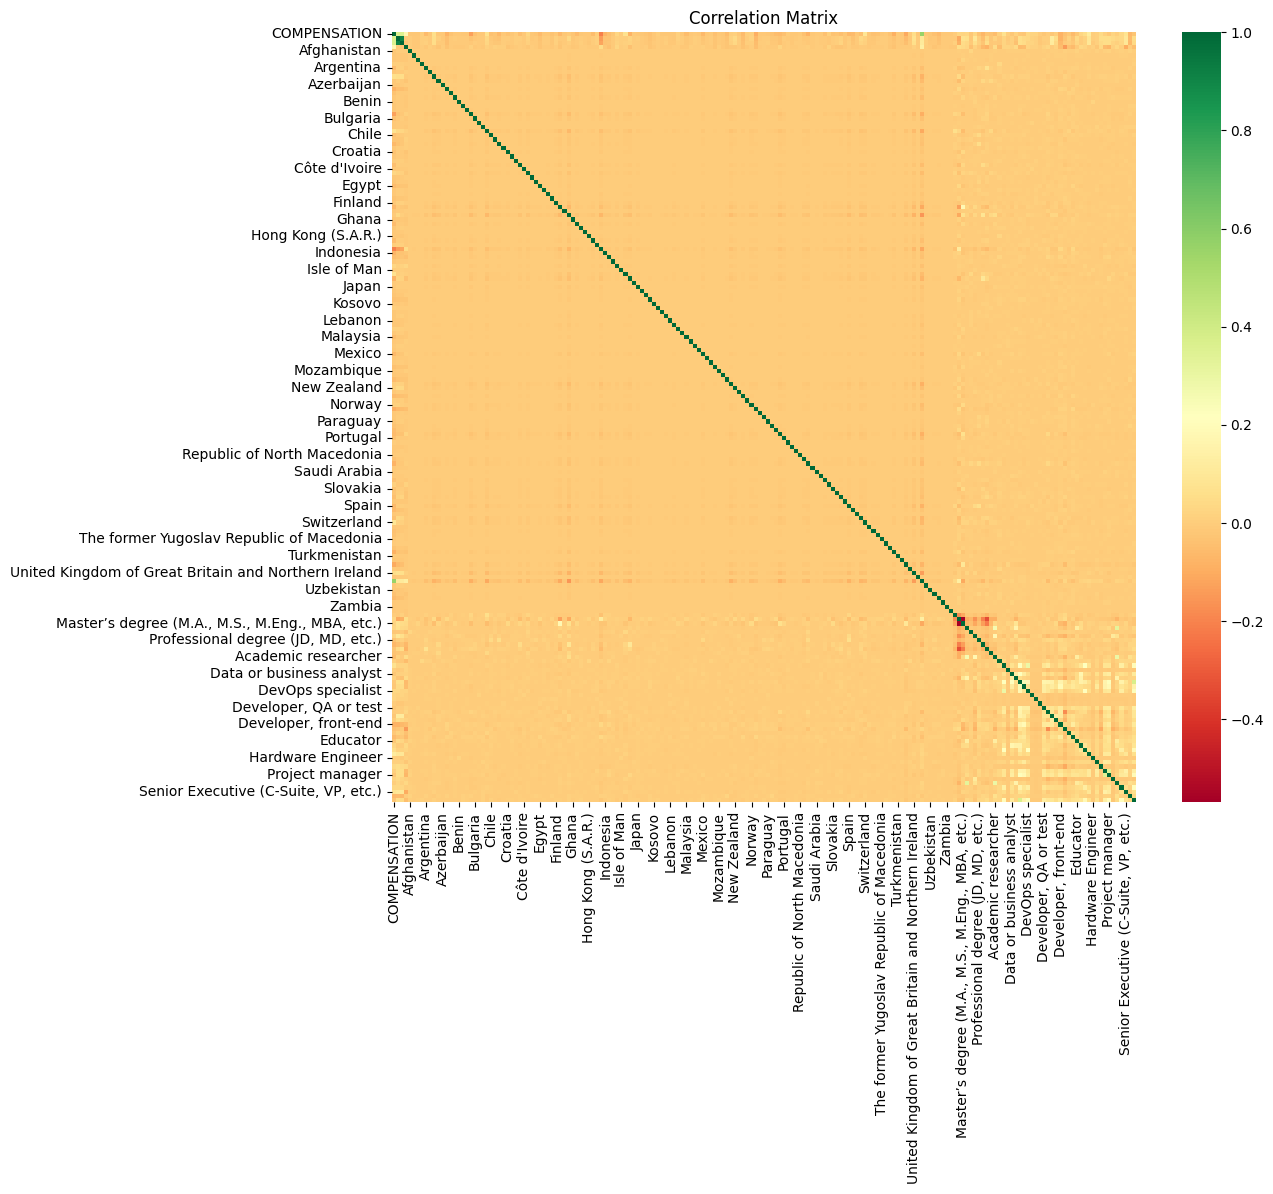

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot w/out outliers
plt.figure(figsize=(12, 6))
sns.histplot(x=compensation_df['COMPENSATION'], color='darkturquoise')
plt.title('Distribution of Compensation')
plt.xlabel('Compensation (USD)')
plt.ylabel('Count')

#plot corr matrix
plt.figure(figsize=(12, 10))
sns.heatmap(compensation_df.corr(), cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

In [9]:
#correlation matrix
compensation_corr = compensation_df.corr()['COMPENSATION'].abs().sort_values(ascending=False)
compensation_corr.head(10)

COMPENSATION                1.000000
United States of America    0.563148
YEARSCODEPRO                0.362495
YEARSCODE                   0.359295
India                       0.213052
ORGSIZE                     0.170039
Brazil                      0.131729
Engineering manager         0.123332
Ukraine                     0.109042
Pakistan                    0.096861
Name: COMPENSATION, dtype: float64

-------------------------------------------------------------------------------------                       

.

**Job Satisfaction Data Exploration**

.

-------------------------------------------------------------------------------------

In [10]:
#show changes
print(f'Number of columns in odf_2024: {odf_2024.shape[1]}')

#columns to include in jobsat_df
jobsat_include_columns = [
    'JOBSAT',
    'JOBSATPOINTS_1', #drives team strategy
    'JOBSATPOINTS_4', #contributes to open source
    'JOBSATPOINTS_5', #secures data and environments
    'JOBSATPOINTS_6', #improves code and dev environments
    'JOBSATPOINTS_7', #learns and uses new technologies
    'JOBSATPOINTS_8', #designs and builds architecture and databases
    'JOBSATPOINTS_9', #expert that others rely on for tools/languages/processes
    'JOBSATPOINTS_10', #works with new or top-tier hardware
    'JOBSATPOINTS_11', #uses a well-supported internal network for easy observability
    'KNOWLEDGE_1', #interacts with people outside immediate team
    'KNOWLEDGE_2', #knowledge silos make it hard to share ideas across org
    'KNOWLEDGE_3', #can find up-to-date info to do job effectively
    'KNOWLEDGE_4', #quickly finds answers using current tools/resources
    'KNOWLEDGE_5', #knows which system/resource to use for questions
    'KNOWLEDGE_6', #often repeats answers to the same questions
    'KNOWLEDGE_7', #delays in getting answers interrupt workflow
    'KNOWLEDGE_8', #feels equipped to work across the company's code/platform
    'KNOWLEDGE_9', #has requested employer reimbursement for helpful tools
    'FREQUENCY_1', #frequency of needing help from people outside the team
    'FREQUENCY_2', #frequency of interacting with people outside the team
    'FREQUENCY_3', #frequency of encountering knowledge silos at work
    'YEARSCODE', #coding experience including education
    'WORKEXP', #total years of work experience
    'FRUSTRATION', #challenges that cause most frustration (10 total)
    'REMOTEWORK', #work situation: Remote, in-person, remote
    'TIMESEARCHING', #time spent search for an answer
    'TIMEANSWERING' #time spent answering questions
]

#creates jobsat_df
jobsat_df = odf_2024[jobsat_include_columns]

#show changes
print(f'Number of columns in jobsat_df: {jobsat_df.shape[1]}')
jobsat_df.head()

Number of columns in odf_2024: 114
Number of columns in jobsat_df: 28


,JOBSAT,JOBSATPOINTS_1,JOBSATPOINTS_4,JOBSATPOINTS_5,JOBSATPOINTS_6,JOBSATPOINTS_7,JOBSATPOINTS_8,JOBSATPOINTS_9,JOBSATPOINTS_10,JOBSATPOINTS_11,KNOWLEDGE_1,KNOWLEDGE_2,KNOWLEDGE_3,KNOWLEDGE_4,KNOWLEDGE_5,KNOWLEDGE_6,KNOWLEDGE_7,KNOWLEDGE_8,KNOWLEDGE_9,FREQUENCY_1,FREQUENCY_2,FREQUENCY_3,YEARSCODE,WORKEXP,FRUSTRATION,REMOTEWORK,TIMESEARCHING,TIMEANSWERING
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Remote,NaN,NaN
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,20,17.0,NaN,Remote,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,Remote,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN


**Cleaning**

In [11]:
#drop all NaN values in JOBSAT column
print(f'Rows before dropping NaN JOBSAT values: {jobsat_df.shape[0]}')
jobsat_df = jobsat_df.dropna(subset=['JOBSAT'])
print(f'Rows after dropping NaN JOBSAT values: {jobsat_df.shape[0]}\n')

# #determines how many rows would be dropped if all NaN are dropped
# determine_drop_all = jobsat_df.copy()
# determine_drop_all = determine_drop_all.dropna()
# #shows changes
# print(f'Rows before dropping all NaN values: {jobsat_df.shape[0]}')
# print(f'Rows after dropping all NaN values: {determine_drop_all.shape[0]}')

#---only 13.5% data lost when all remaining NaNs dropped, so will just drop all remainingNaN---#
print(f'Rows before dropping all remaining NaN values: {jobsat_df.shape[0]}')
jobsat_df = jobsat_df.dropna()
print(f'Rows after dropping all remaining NaN values: {jobsat_df.shape[0]}\n')

#ensure no more NaN
if sum(compensation_df.isna().sum()) == 0:
    print('All NaN values successfully removed')
else:
    print('Error: Dataset still contains NaN values')

#reset index
jobsat_df = jobsat_df.reset_index(drop=True)

Rows before dropping NaN JOBSAT values: 65437
Rows after dropping NaN JOBSAT values: 29126

Rows before dropping all remaining NaN values: 29126
Rows after dropping all remaining NaN values: 25213

All NaN values successfully removed


In [12]:
#manually encode all the ordinal features
knowledge_order = {
    'Strongly agree': 4, 
    'Agree': 3,
    'Neither agree nor disagree': 2,
    'Disagree': 1,
    'Strongly disagree': 0
}
for i in range(1, 10): 
    jobsat_df['KNOWLEDGE_'+str(i)] = jobsat_df['KNOWLEDGE_'+str(i)].map(knowledge_order)

frequency_order = {
    'Never': 0, 
    '1-2 times a week': 1,
    '3-5 times a week': 2, 
    '6-10 times a week': 3, 
    '10+ times a week': 4
}
for i in range(1,4): 
    jobsat_df['FREQUENCY_'+str(i)] = jobsat_df['FREQUENCY_'+str(i)].map(frequency_order)

time_spent_order = {
    '15-30 minutes a day' : 0,
    '30-60 minutes a day' : 1,
    'Less than 15 minutes a day' : 2,
    '60-120 minutes a day' : 3,
    'Over 120 minutes a day' : 4
}
jobsat_df['TIMESEARCHING'] = jobsat_df['TIMESEARCHING'].map(time_spent_order)
jobsat_df['TIMEANSWERING'] = jobsat_df['TIMEANSWERING'].map(time_spent_order)

#get dummies for FRUSTRATIONS and REMOTEWORK column
frustration_dummies = jobsat_df['FRUSTRATION'].str.get_dummies(sep=';')
remote_dummies = pd.get_dummies(jobsat_df['REMOTEWORK']).astype(int)

#add to jobsat_df
jobsat_df = pd.concat([jobsat_df, frustration_dummies], axis=1)
jobsat_df = pd.concat([jobsat_df, remote_dummies], axis=1)

#drop old columns
jobsat_df = jobsat_df.drop(columns=['FRUSTRATION', 'REMOTEWORK'])

#get float columns and convert to int
float_cols = jobsat_df.select_dtypes(include='float').columns
jobsat_df[float_cols] = jobsat_df[float_cols].astype(int)

#convert YEARSCODE to int
jobsat_df['YEARSCODE'] = jobsat_df['YEARSCODE'].replace({
    'More than 50 years': '50',
    'Less than 1 year': '1'
})
jobsat_df['YEARSCODE'] = jobsat_df['YEARSCODE'].astype(int)

#rename columns
jobsat_df = jobsat_df.rename(columns={
    'WORKEXP' : 'YEARSWORKED',
    'Complexity of tech stack for build' : 'FRUSTRATION_1',
    'Complexity of tech stack for deployment' : 'FRUSTRATION_2',
    'Amount of technical debt' : 'FRUSTRATION_3',
    'Number of software tools in use' : 'FRUSTRATION_4',
    'Patching/updating core components' : 'FRUSTRATION_5',
    'Maintaining security of code being produced' : 'FRUSTRATION_6',
    'Maintaining security of systems/platforms used in work' : 'FRUSTRATION_7',
    'Reliability of tools/systems used in work' : 'FRUSTRATION_8',
    'Tracking my work' : 'FRUSTRATION_9',
    'Showing my contributions' : 'FRUSTRATION_10',
    'None of these' : 'FRUSTRATION_11',
    'Hybrid (some remote, some in-person)' : 'HYBRID',
    'In-person' : 'IN-PERSON',
    'Remote' : 'REMOTE'
})

pd.set_option('display.max_columns', None)
print(jobsat_df.shape)
jobsat_df.head()

(25213, 40)


,JOBSAT,JOBSATPOINTS_1,JOBSATPOINTS_4,JOBSATPOINTS_5,JOBSATPOINTS_6,JOBSATPOINTS_7,JOBSATPOINTS_8,JOBSATPOINTS_9,JOBSATPOINTS_10,JOBSATPOINTS_11,KNOWLEDGE_1,KNOWLEDGE_2,KNOWLEDGE_3,KNOWLEDGE_4,KNOWLEDGE_5,KNOWLEDGE_6,KNOWLEDGE_7,KNOWLEDGE_8,KNOWLEDGE_9,FREQUENCY_1,FREQUENCY_2,FREQUENCY_3,YEARSCODE,YEARSWORKED,TIMESEARCHING,TIMEANSWERING,FRUSTRATION_3,FRUSTRATION_1,FRUSTRATION_2,FRUSTRATION_6,FRUSTRATION_7,FRUSTRATION_11,FRUSTRATION_4,FRUSTRATION_5,FRUSTRATION_8,FRUSTRATION_10,FRUSTRATION_9,HYBRID,IN-PERSON,REMOTE
0,8,50,0,0,25,10,0,15,0,0,4,3,4,3,3,4,3,2,2,2,3,3,20,15,1,3,1,0,0,0,0,0,1,0,0,1,1,0,0,1
1,8,0,0,30,30,0,0,20,10,10,4,1,2,3,3,0,3,3,0,1,1,1,20,12,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,5,0,0,0,0,0,0,0,0,0,4,2,3,1,2,3,3,2,0,1,2,1,31,29,3,3,1,1,1,1,0,0,0,0,0,0,0,1,0,0
3,10,10,0,10,60,10,10,0,0,0,3,3,2,3,4,3,1,3,2,0,2,2,12,12,0,1,1,1,0,0,1,0,0,1,1,0,1,1,0,0
4,6,90,100,100,100,90,90,100,90,100,4,2,2,3,4,3,4,3,4,0,4,3,5,10,2,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0


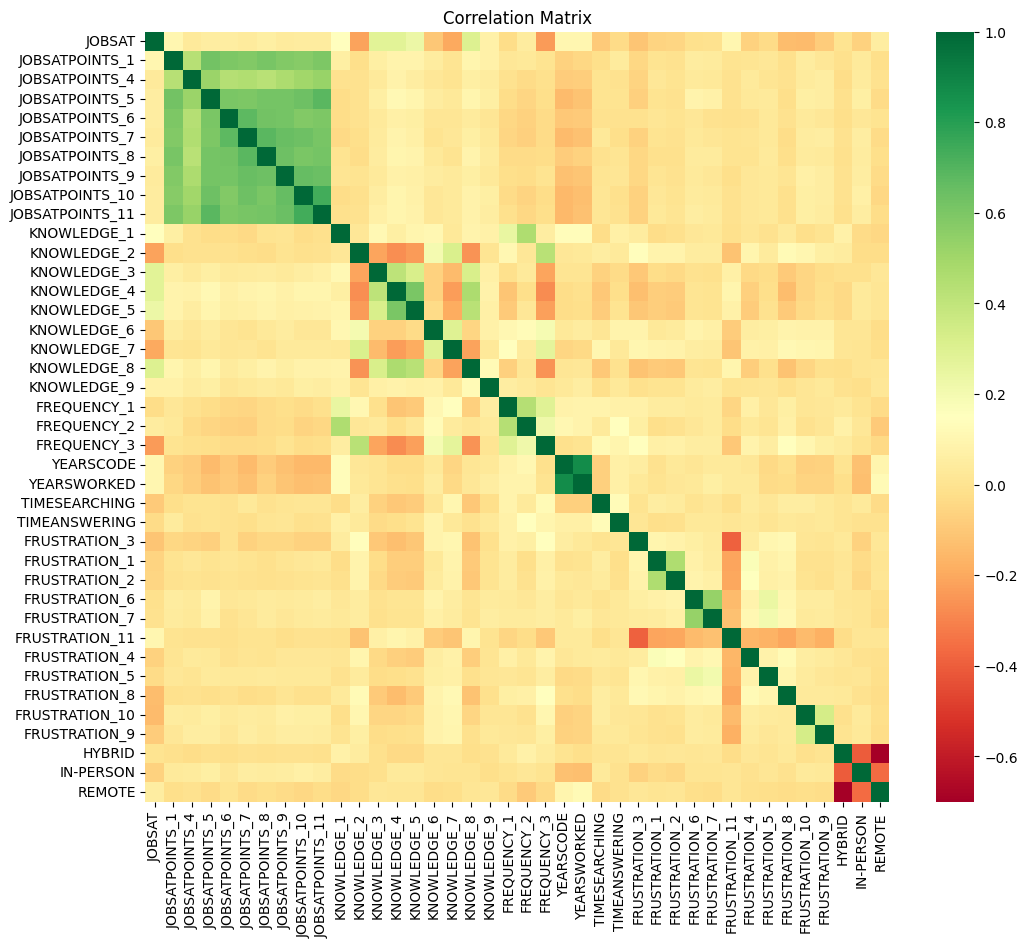

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(jobsat_df.corr(), cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

In [14]:
#correlation matrix
jobsat_corr = jobsat_df.corr()['JOBSAT'].abs().sort_values(ascending=False)
jobsat_corr.head(15)

JOBSAT            1.000000
KNOWLEDGE_8       0.297007
KNOWLEDGE_3       0.282274
KNOWLEDGE_4       0.280602
FREQUENCY_3       0.238412
KNOWLEDGE_5       0.234640
KNOWLEDGE_2       0.220203
KNOWLEDGE_7       0.197609
KNOWLEDGE_1       0.148901
FRUSTRATION_10    0.147535
FRUSTRATION_8     0.138509
FRUSTRATION_3     0.111080
KNOWLEDGE_6       0.104809
YEARSCODE         0.100469
FRUSTRATION_11    0.099804
Name: JOBSAT, dtype: float64